In [ ]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install tensorflow==2.12.0

the ! at the beginning of a line is used to run shell (terminal) commands, not Python code.

In [ ]:
import tensorflow as tf
print(tf.__version__)    #now this version has keras integrated to it
#print(tf.config.list_physical_devices('GPU')

2.12.0


In [ ]:
## importing some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading the dataset

dataset = pd.read_csv('Churn_Modelling.csv')

dataset.head()   #the following is a binary classification problem and we are trying to see that if the customer will exit the bank or not

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## dividing the data sets into dependent and independent features

x = dataset.iloc[:, 3:13]  #3rd will be counted that is the creditScore to 12th salary
y = dataset.iloc[:, 13]    #only 13th that is the xit


In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
## Feature Engineering -> haldling the catagorical features like geography and gender

## for geography and gender we can convert it into "oneHotEncoded"
geography = pd.get_dummies(x['Geography'], drop_first= True)  ##if first two are false then the thored must be true,so we dont need the thord one
geography

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [ ]:
gender =  pd.get_dummies(x['Gender'], drop_first=True)
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [ ]:
# concatenate thses variables with dataframe , so first we need to drop the gender and the geography

x = x.drop(['Geography', 'Gender'],axis=1)  #as we need to drop the colum only , not the rows

In [ ]:
x=pd.concat([x,geography,gender], axis=1)  #as concat should happen only on column wise not on row wise
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [ ]:
#spliting the data into training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

#for ANN ->featuring scaling is required
#feature scaling


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
x_train.shape   ##basically 11 rows means 11 inputs

(8000, 11)

In [ ]:
# now lets create the ANN -> Artificial Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
## lets initialise the ANN

classifier=Sequential()

In [ ]:
## Adding an input(11 inputs are here in training set) layer  ->we have to use dense layer

classifier.add(Dense(units=11, activation='relu'))  #relu will be added to the next layer

In [ ]:
# adding the first hidden layer

classifier.add(Dense(units=7, activation='relu'))

In [ ]:
# adding the 2nd hidden layer

classifier.add(Dense(units=6, activation='relu'))

##suppose here you want to add a dropout

classifier.add(Dropout(0.3))

In [ ]:
# adding the output layer

classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# now train the whole neural networks

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## here adam use a deafault learning rate = 0.01
## if you want to add an optimisers of your own then do the following

In [ ]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(
    learning_rate=0.01
)

##now in  the above code of this code you can use opt in stead of 'adam'

In [ ]:
## training will start by below
model_history=classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

## below 536 is the iterations

## it will keep on running till 100 epoches , but at some point if the accuracy doe not change we can also pause it by the following code

Epoch 1/100
536/536 [==============================] - 4s 4ms/step - loss: 0.5091 - accuracy: 0.7751 - val_loss: 0.4538 - val_accuracy: 0.7978
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4364 - accuracy: 0.8078 - val_loss: 0.4331 - val_accuracy: 0.8137
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4214 - accuracy: 0.8194 - val_loss: 0.4270 - val_accuracy: 0.8179
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4114 - accuracy: 0.8272 - val_loss: 0.4190 - val_accuracy: 0.8205
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4038 - accuracy: 0.8334 - val_loss: 0.4141 - val_accuracy: 0.8251
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3989 - accuracy: 0.8330 - val_loss: 0.4091 - val_accuracy: 0.8243
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3942 - accuracy: 0.8371 - val_loss: 0.4044 - val_accuracy: 0.8266

KeyboardInterrupt: 

In [ ]:
##Early stopping -> Stop training when a monitored metric has stopped improving.
## copies form early stopping keras documentation
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [ ]:
model_history=classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=100, callbacks=[early_stopping])
# it stops when the validation loss does not improve much

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3198 - accuracy: 0.8647 - val_loss: 0.3590 - val_accuracy: 0.8523
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3185 - accuracy: 0.8666 - val_loss: 0.3650 - val_accuracy: 0.8497
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3180 - accuracy: 0.8656 - val_loss: 0.3586 - val_accuracy: 0.8523
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3195 - accuracy: 0.8653 - val_loss: 0.3624 - val_accuracy: 0.8466
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3176 - accuracy: 0.8670 - val_loss: 0.3597 - val_accuracy: 0.8557
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3177 - accuracy: 0.8655 - val_loss: 0.3611 - val_accuracy: 0.8489
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3178 - accuracy: 0.8655 - val_loss: 0.3591 - val_accuracy: 0.8504

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

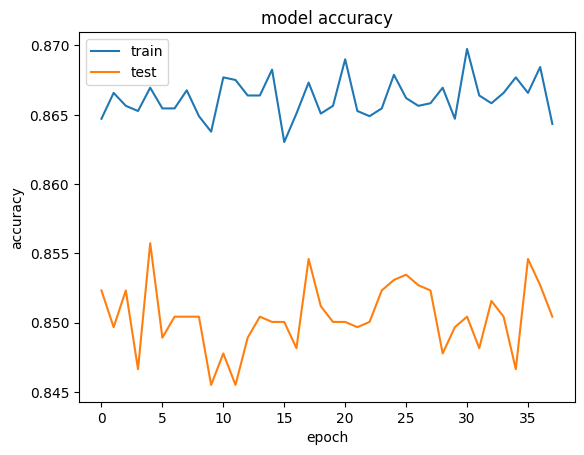

In [ ]:
# summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Text(0.5, 0, 'epoch')

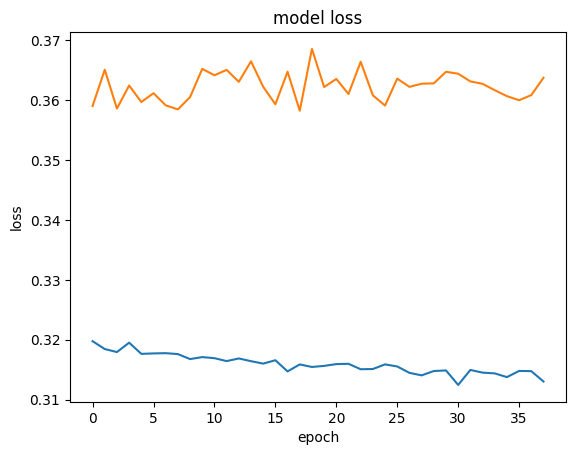

In [ ]:
# summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [ ]:
#make the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1475,  120],
       [ 180,  225]])

In [ ]:
## calculate the accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.85

In [ ]:
classifier.get_weights()

[array([[-4.4006478e-02, -2.6884624e-01,  5.0180387e-01,  2.9604716e-02,
          5.3066702e-04,  4.4116649e-01,  4.1564536e-01,  3.0249292e-01,
          1.8198900e-01, -7.4077606e-02, -3.9819241e-01],
        [ 3.6770836e-01, -4.5004883e-01, -3.5651416e-01,  7.2497183e-01,
         -2.9330030e-01, -3.0718270e-01, -3.5965598e-01, -3.5995436e-01,
         -8.6045152e-01,  4.6771336e-02,  5.8011711e-01],
        [-2.9358998e-01,  3.3405727e-01,  4.2745650e-01,  1.1915873e-01,
         -1.4006421e-01,  4.9738832e-02,  1.5064077e-01,  4.6988061e-01,
          9.5118470e-02,  1.2618512e-01, -2.6507062e-01],
        [ 3.5401461e-01, -2.8167310e-01,  4.3794635e-01, -2.0033467e-01,
          1.0883899e-01,  1.2619971e-01, -6.1258256e-01, -1.0255851e-01,
         -3.9741267e-02, -4.2009363e-01, -2.5679991e-01],
        [ 7.2442353e-01, -2.6716167e-01, -1.6401786e-01,  2.1592969e-01,
          3.3368100e-04, -1.0633085e+00, -2.1392709e-01,  9.3977237e-01,
         -1.5441923e-02, -1.4047801e+0